In [105]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

# More on classes

In [149]:
class Soundfile:
    """ Pass in a file path and load a sound file

    usage:
    >>> sf = Soundfile('path/to/soundfile')
    >>> sf.play() : plays the file
    >>> sf.plot() : plots the file

    advanced:

    >>> sf.play(start, stop) plays a portion
    """
    # initialization
    def __init__(self, path):
        # 1. load a soundfile
        self.audio, self.samplerate = librosa.load(path)

    def plot(self):
        # 2. plot a soundfile
        fig = plt.figure(figsize=(12,4))
        librosa.display.waveplot(self.audio, sr=self.samplerate)
        plt.show()
        plt.close()
        # methods (aka. functions)

    def play(self):
        # 3. play the soundfile
        ipd.display(ipd.Audio(self.audio,rate=self.samplerate))
    
    def length(self, test):
        return len(test)


In [150]:
filepaths = [librosa.ex('trumpet'), librosa.ex('brahms')]
soundfiles = [ Soundfile(i) for i in filepaths ]

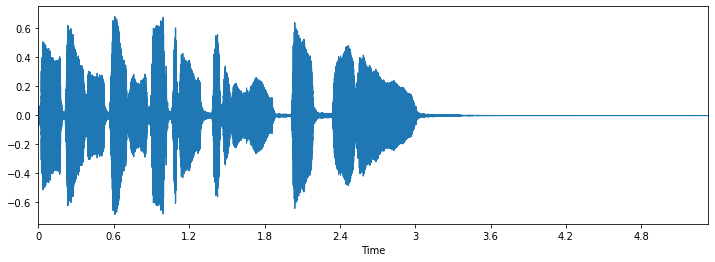

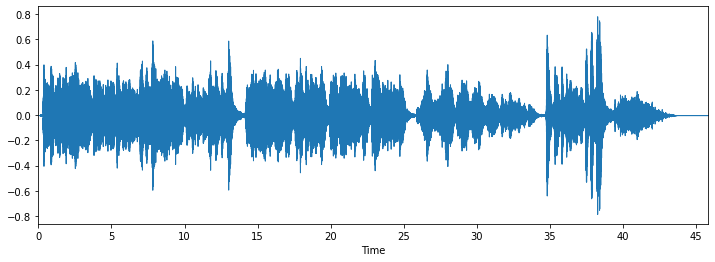

[None, None]

In [141]:
[ soundfile.plot() for soundfile in soundfiles ]
# soundfiles[1].play()

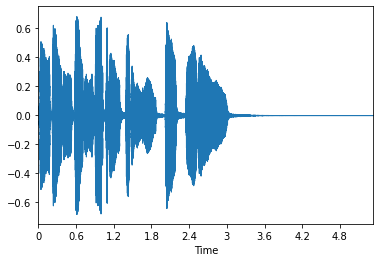

In [125]:
sf.plot()
sf.play()

In [126]:
sf2 = Soundfile(librosa.ex('brahms'))

In [127]:
sf2.plot()
sf2.play()

Output hidden; open in https://colab.research.google.com to view.

In [147]:
sf.audio, sf.samplerate = librosa.load(librosa.ex('brahms'),offset=10, duration=2)

In [148]:
sf.play()

In [152]:
a = soundfiles[0]
a.length([3,4,5,6,7])

5

In [97]:
sf = Soundfile()

In [ ]:
class Spectrum:
    """Pass in an audio array and calculates the spectrum

    usage:
    s = Spectrum(y)

    s.plot() : plots the spectrum

    """

In [ ]:
s = Spectrum()

# Review: A Melodic Extraction `class`
Making a class that, given a sound file, estimates a sequence of fundamental frequencies, with multiple estimation methods.

In [91]:
class MelodicExtractor:
    """A melodic extraction class

    Parameters
    -------------------
    path : path to a sound file

    Usage
    -------------------
    >>> me = MelodicExtractor('myfile')
    
    Functions
    -------------------
    >>> # returns the dft estimation
    >>> me.dft_estimate
    [ 124.34, 43.53, 856.54, ..., 342.34 ]
    >>> # plays the soundfile generated by the given method
    >>> me.play('method_name') 

    """
    # initialization method

        # 'self' variables
        # 1. load a sound
        # 2. onset detect
        # 3. split file
        # 4. estimate with dft
        # 5. estimate with autocorr

    # methods (aka. functions) 

    def play(self, select):
        """Plays a soundfile generated with the dft or autocorr, 
        use the 'select' variable to choose the method
        """


In [ ]:
me = MelodicExtractor()

## solutions

In [87]:
#@title solution
class MelodicExtractorSolution:
    def __init__(self, path):
        self.y, self.sr = librosa.load(path)
        self.hop_length = 128
        self.segment() # segment the audio
        self.autocorr = [ self.autocorr_estimate(i) for i in self.segments ]
        self.dftest = [ self.dft_estimate(i) for i in self.segments ]

    def segment(self):
        onsets = librosa.onset.onset_detect(self.y, 
                                            sr=self.sr, 
                                            hop_length=self.hop_length)
        b = np.concatenate([[0], onsets*self.hop_length, [len(self.y)]])
        self.segments = []
        for i in range(len(b)-1):
            start = b[i]
            stop = b[i+1]
            seg = self.y[start:stop]
            self.segments.append(seg)

    def autocorr_estimate(self, x, midi_lo=12., midi_hi=120.):
        """
        Find the location of the maximum autocorrelation.
        """
        r = librosa.autocorrelate(x, max_size=5000)

        
        # only to search within a range of reasonable pitches:
        f_hi = librosa.midi_to_hz(midi_hi)
        f_lo = librosa.midi_to_hz(midi_lo)
        t_lo = self.sr/f_hi
        t_hi = self.sr/f_lo
        
        # Set invalid pitch candidates to zero:
        r[:int(t_lo)] = 0
        r[int(t_hi):] = 0

        return float(self.sr)/r.argmax() if r.any() else -1

    def dft_estimate(self, x):

        # compute the magnitude 
        mag = np.abs(np.fft.fft(x))
        # get rid of second half (symmetrical)
        mag = mag[0:int(len(mag)/2)]
        
        pitch_estimate = np.argmax(mag) * self.sr / len(x)

        return pitch_estimate
    
    def play(self, estimate):
        tone =  [ generate_tone(f,self.sr,len(s)) for f,s in zip(estimate, self.segments) ]
        ipd.display(ipd.Audio(np.concatenate(tone),rate=self.sr))


In [88]:
solution = MelodicExtractorSolution(librosa.ex('trumpet'))

In [89]:
solution.play(solution.autocorr)

In [90]:
solution.play(solution.dftest)

# useful functions

#### Autocorrelation

In [29]:
def autocorr_estimate(x, sr=22050, midi_lo=12., midi_hi=120.):
    """
    Find the location of the maximum autocorrelation.
    """
    r = librosa.autocorrelate(x, max_size=5000)

    
    # only to search within a range of reasonable pitches:
    f_hi = librosa.midi_to_hz(midi_hi)
    f_lo = librosa.midi_to_hz(midi_lo)
    t_lo = sr/f_hi
    t_hi = sr/f_lo
    
    # Set invalid pitch candidates to zero:
    r[:int(t_lo)] = 0
    r[int(t_hi):] = 0

    return float(sr)/r.argmax() if r.any() else -1

#### DFT Method

In [45]:
def dft_estimate(x, sr=22050):
    # compute the magnitude 
    mag = np.abs(np.fft.fft(x))
    # get rid of second half (symmetrical)
    mag = mag[0:int(len(mag)/2)]
    
    pitch_estimate = np.argmax(mag) * sr / len(x)


    return pitch_estimate

In [53]:
def generate_tone(f0, sr, n_duration, amp=0.1):
    n = np.arange(n_duration)
    return amp * np.sin(2*np.pi*f0*n/float(sr))